In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
%cd /Users/dane/src/fitbit


#dfw=df1415.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
#df1 = dfw[['biking_dane','steps_dane','steps_cindy', 'temp','humid','calories_dane', 'calories_cindy', 'weight_cindy','weight_dane']].convert_objects(convert_numeric=True)


/Users/dane/src/fitbit


In [8]:
def long2wide(df, suffix=''):
    dfw = df.pivot(index='date', columns='name', values='value').convert_objects(convert_numeric=True)
    if suffix:
        dfw.rename(columns=lambda x: x + '_' + suffix, inplace=True)
    return dfw

In [15]:
cindy = pd.read_csv('fb_long_cindy.csv', header=False, names=['date', 'name', 'value'])
dane = pd.read_csv('fb_long_dane.csv', header=False, names=['date', 'name', 'value'])
cw = long2wide(cindy, suffix='c')
dw = long2wide(dane, suffix='d')
all = cw.merge(dw)
all.head()

MergeError: No common columns to perform merge on

In [13]:
cw.head()

name        calories_c  distance_c  elevation_c  floors_c  steps_c  weight_c
date                                                                        
2012-12-15        2224        8.28          220        22    17442     153.0
2012-12-16        2529       10.94          250        25    23434       NaN
2012-12-17        1988        5.84           20         2    12473     153.9
2012-12-18        2178        6.15           60         6    13202     153.5
2012-12-19        2003        5.79            0         0    12330     153.4

In [16]:
dw.head()

name        biking_d  calories_d  dist_aw_d  distance_d  elevation_d  \
date                                                                   
2012-11-01       NaN        2087        NaN        5.22          NaN   
2012-11-02      15.3        2316        NaN        5.43          NaN   
2012-11-03       NaN        2479        NaN        8.46          NaN   
2012-11-04      10.5        2298        NaN        5.41          NaN   
2012-11-05       NaN        1976        NaN        4.96          NaN   

name        floors_d  steps_d  steps_aw_d  weight_d  
date                                                 
2012-11-01       NaN    10663         NaN       NaN  
2012-11-02       NaN    11085         NaN       NaN  
2012-11-03       NaN    17284         NaN       NaN  
2012-11-04       NaN    11044         NaN       NaN  
2012-11-05       NaN    10131         NaN       NaN

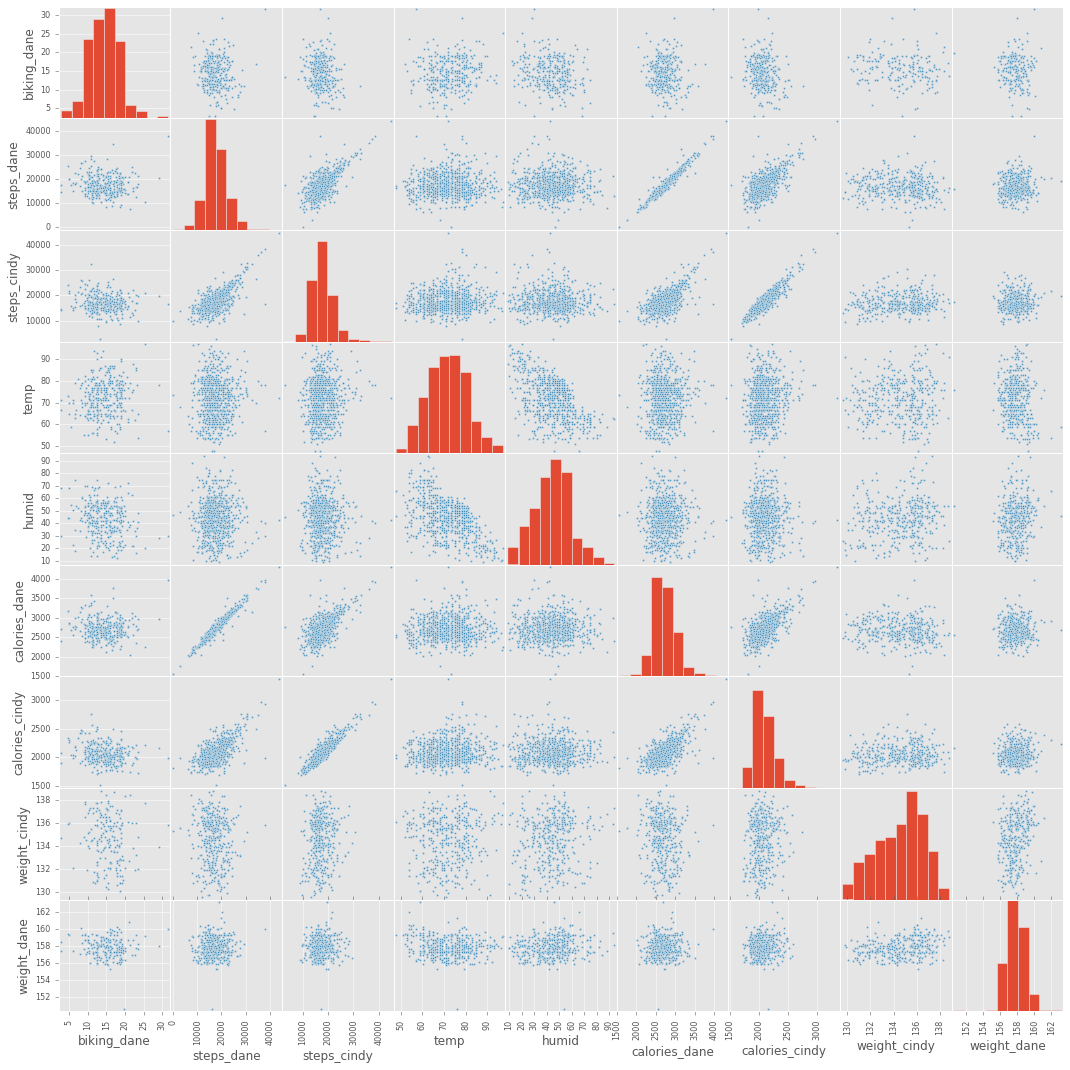

In [3]:
scatter_matrix(df1, alpha=0.8, figsize=(18, 18))
plt.show()

In [4]:
df45 = df[(df.date>='2014-01-01') & (df.date<='2015-12-31')]

In [5]:
df45w=df45.pivot(index='date', columns='variable', values='value').convert_objects(convert_numeric=True)
df45w.dtypes

variable
Travel             object
biking_dane       float64
calories_cindy      int64
calories_dane       int64
conditions         object
distance_cindy    float64
distance_dane     float64
humid             float64
rain              float64
steps_cindy         int64
steps_dane          int64
temp              float64
weight_cindy      float64
weight_dane       float64
wind              float64
dtype: object

In [6]:
df45w['dt'] = df45w.index
df45w.index=pd.to_datetime(df45w.dt,format='%Y-%m-%d')
df45w.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', 
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='dt', length=730, freq=None, tz=None)

In [7]:
dfm = pd.groupby(df45w,by=[df45w.index.year, df45w.index.month])

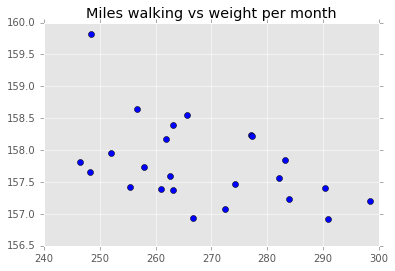

In [8]:
plt.plot(dfm.steps_dane.sum()/2000.,dfm.weight_dane.mean(),'bo')
plt.title('Miles walking vs weight per month')
plt.show()

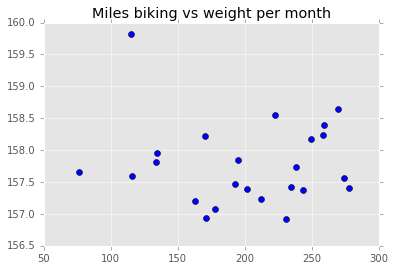

In [9]:
plt.plot(dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Miles biking vs weight per month')
plt.show()

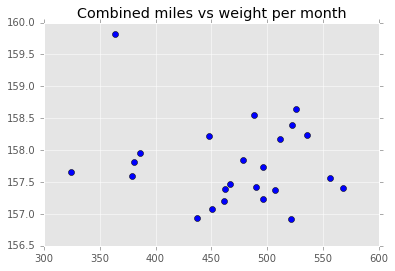

In [10]:
plt.plot(dfm.steps_dane.sum()/2000.+dfm.biking_dane.sum(),dfm.weight_dane.mean(),'bo')
plt.title('Combined miles vs weight per month')
plt.show()

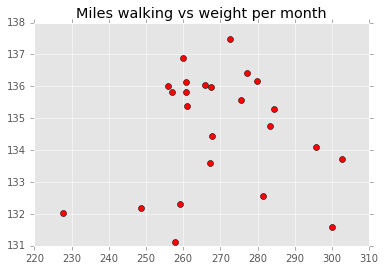

In [11]:
plt.plot(dfm.steps_cindy.sum()/2000.,dfm.weight_cindy.mean(),'ro')
plt.title('Miles walking vs weight per month')
plt.show()

In [12]:
df45w['goalmet_cindy'] = np.where(df45w['steps_cindy'] > 14000,1,-1)
df45w['goalmet_dane'] = np.where(df45w['steps_dane'] > 14000,1,-1)


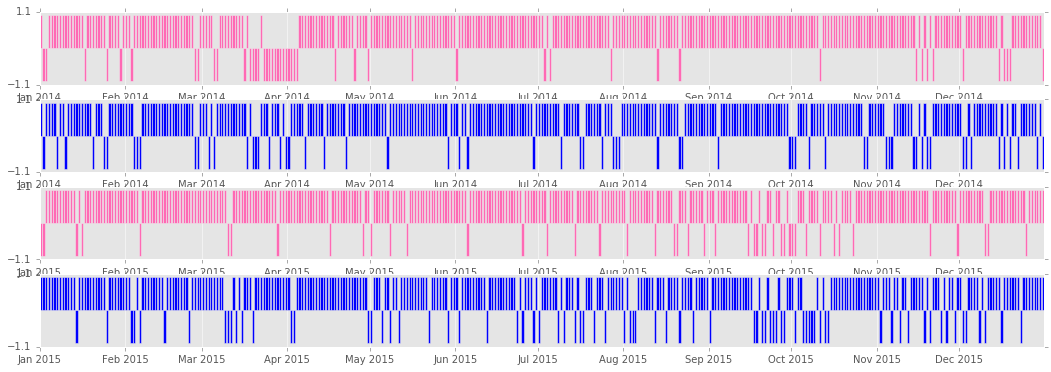

In [13]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
dfp = df45w[df45w.index < '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(412)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.subplot(413)
dfp = df45w[df45w.index >= '2015-01-01']
plt.bar(dfp.index, dfp.goalmet_cindy, color='hotpink')
plt.yticks([-1.1,1.1])
plt.subplot(414)
plt.bar(dfp.index, dfp.goalmet_dane, color='b')
plt.yticks([-1.1,1.1])
plt.show()

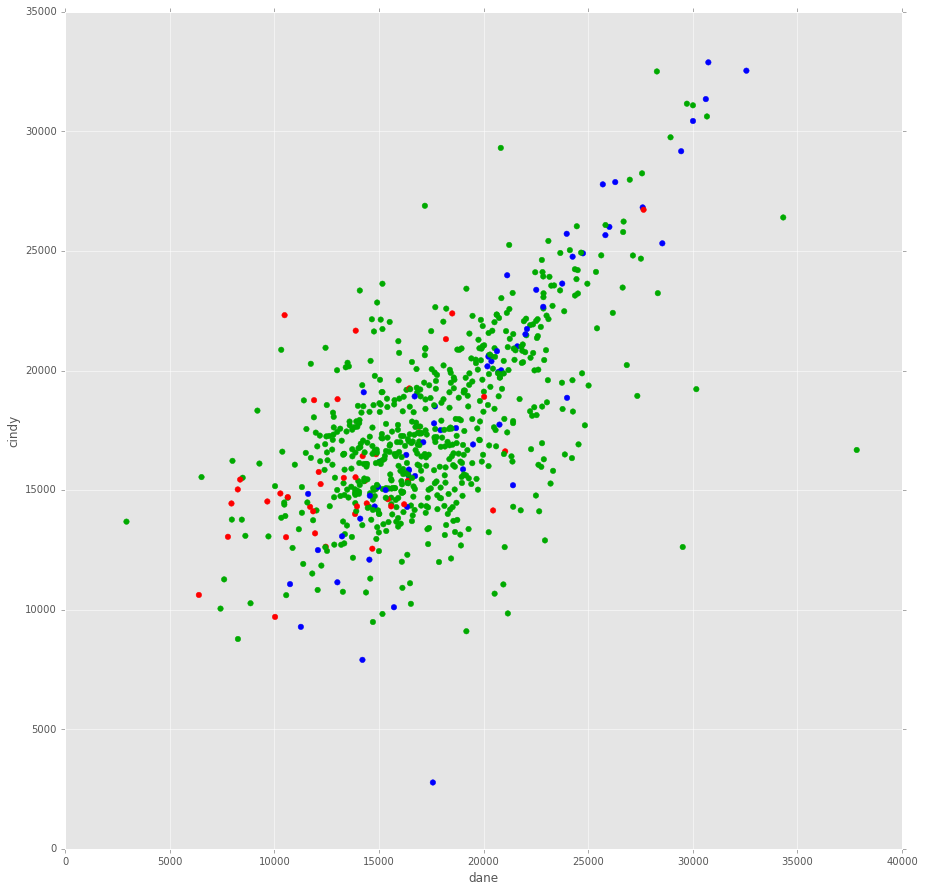

In [14]:
fig = plt.gcf()
fig.set_size_inches(15,15)
df45w.ix[df45w.Travel=='Work', 'color'] = '#FF0000'      # Work is red
df45w.ix[pd.isnull(df45w.Travel), 'color'] = '#00AA00'   # none is green
df45w.ix[df45w.Travel=='Vacation', 'color'] = '#0000FF'  # Vacation is blue
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000)]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.xlabel('dane')
plt.ylabel('cindy')


In [15]:
dfp.goalmet_cindy.value_counts()

 1    319
-1     46
dtype: int64

In [16]:
dfp.goalmet_dane.value_counts()

 1    288
-1     77
dtype: int64

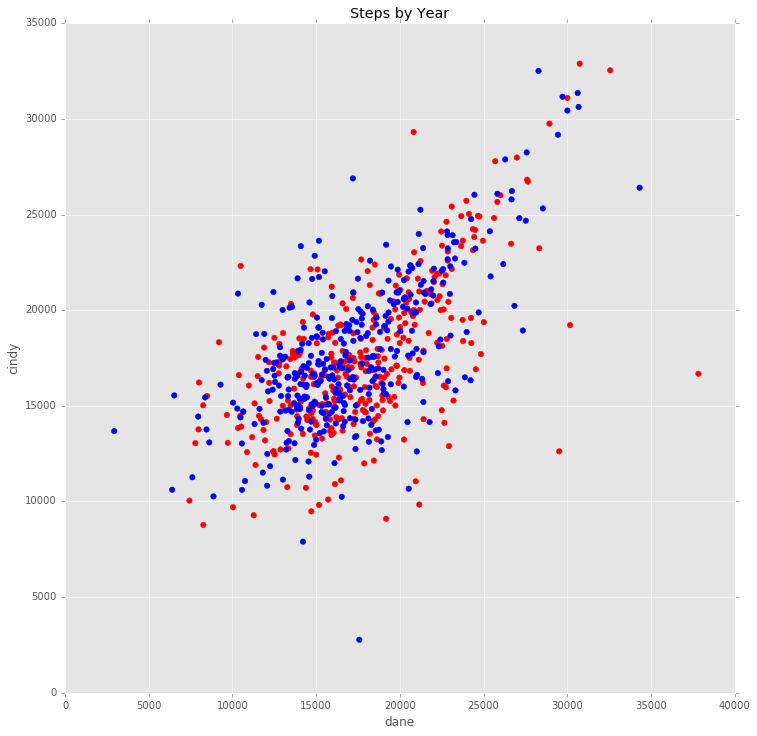

In [17]:
fig = plt.gcf()
fig.set_size_inches(12,12)
df45w.ix[df45w.index.year==2014, 'color'] = '#FF0000'  #  red
df45w.ix[df45w.index.year==2015, 'color'] = '#0000FF'  #  blue
xx = df45w[(df45w.steps_dane>1000) & (df45w.steps_cindy>1000) & (df45w.steps_cindy<35000)]
#plt.scatter(df45w.steps_dane, df45w.steps_cindy, color=df45w.color, s=30)
plt.scatter(xx.steps_dane, xx.steps_cindy, color=xx.color, s=30)
plt.title('Steps by Year')
plt.xlabel('dane')
plt.ylabel('cindy')

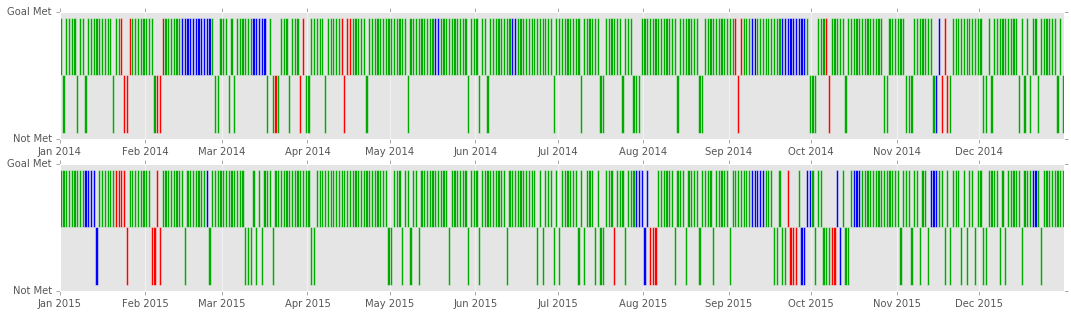

In [32]:
df45w.ix[df45w.Travel=='Work', 'color'] = '#FF0000'      # Work is red
df45w.ix[pd.isnull(df45w.Travel), 'color'] = '#00AA00'   # none is green
df45w.ix[df45w.Travel=='Vacation', 'color'] = '#0000FF'  # Vacation is blue
red = '#FF0000'
green = '#00AA00'
blue = '#0000FF'
cmap = {'Work': red, 'Vacation': blue}

color = df45w.Travel.apply(lambda x: cmap.get(x, green))

fig = plt.gcf()
fig.set_size_inches(18,5)
plt.figure(1)
plt.subplot(211)
dfp = df45w[(df45w.index <= '2014-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.Travel.apply(lambda x: cmap.get(x, green)))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.subplot(212)
dfp = df45w[(df45w.index >= '2015-01-01')&(df45w.index <= '2015-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.Travel.apply(lambda x: cmap.get(x, green)))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.show()

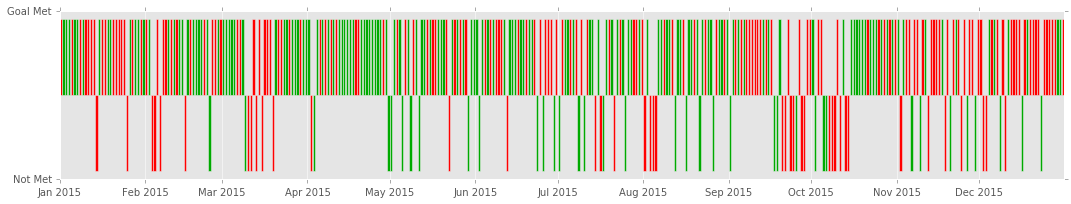

In [38]:
red = '#FF0000'
green = '#00AA00'
blue = '#0000FF'
fig = plt.gcf()
fig.set_size_inches(18,3)
plt.figure(1)
dfp = df45w[(df45w.index >= '2015-01-01')&(df45w.index <= '2015-12-31')]
plt.bar(dfp.index, dfp.goalmet_dane, color=dfp.biking_dane.apply(lambda x: green if x>0 else red))
plt.yticks([-1.1,1.1])
plt.gca().set_yticklabels(['Not Met', 'Goal Met'])
plt.show()

In [39]:
dfp.head()

variable   Travel  biking_dane  calories_cindy  calories_dane  \
dt                                                              
2015-01-01    NaN          NaN            1860           2691   
2015-01-02    NaN         17.0            1844           2802   
2015-01-03    NaN         23.5            2090           2706   
2015-01-04    NaN          9.0            2095           2848   
2015-01-05    NaN          NaN            1960           2594   

variable          conditions  distance_cindy  distance_dane  humid  rain  \
dt                                                                         
2015-01-01             Clear            6.25           8.52     32     0   
2015-01-02  Scattered Clouds            6.50           9.44     37     0   
2015-01-03     Partly Cloudy            9.18           8.68     41     0   
2015-01-04     Mostly Cloudy            7.88           9.31     47     0   
2015-01-05     Mostly Cloudy            7.70           7.82     44     0   

variable    steps_cindy  steps_dane  temp  weight_cindy  weight_dane  wind  \
dt                                                                           
2015-01-01        13415       17393  53.1         135.6        158.0   4.6   
2015-01-02        13370       19283  52.0         134.8        158.2   5.8   
2015-01-03        19565       17724  54.0         134.8        157.6   6.9   
2015-01-04        16887       19018  55.0         134.8        157.6   4.6   
2015-01-05        16418       15800  59.0         134.4        158.8   1.0   

variable            dt  goalmet_cindy  goalmet_dane    color  
dt                                                            
2015-01-01  2015-01-01             -1             1  #00AA00  
2015-01-02  2015-01-02             -1             1  #00AA00  
2015-01-03  2015-01-03              1             1  #00AA00  
2015-01-04  2015-01-04              1             1  #00AA00  
2015-01-05  2015-01-05              1             1  #00AA00